# Example: Univariate Distributions
This notebook demonstrates how the univariate module can be used to model one-dimensional continuous distributions.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from copulas.univariate import *
from copulas.univariate import select_univariate

We'll start by generating some data from the normal distribution. We'll try to learn the distribution using some of the univariate models and plot the real and synthetic datasets.

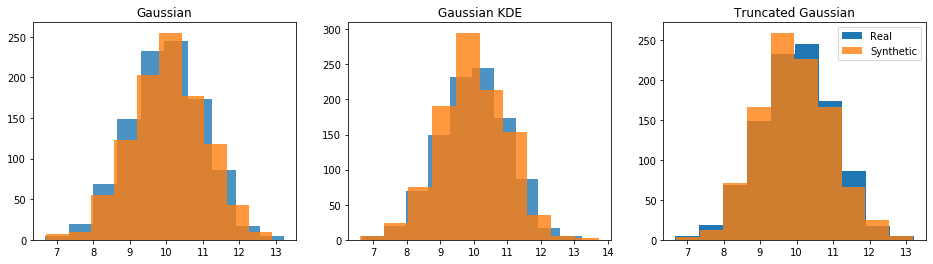

In [2]:
data = np.random.normal(loc=10.0, scale=1.0, size=1000)
def fit_and_sample(model):
    model.fit(data)
    return model.sample(1000).flatten()

plt.figure(figsize=(16,4))

plt.subplot(1, 3, 1)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(GaussianUnivariate()), alpha=0.8, label="Synthetic")
plt.title("Gaussian")

plt.subplot(1, 3, 2)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(GaussianKDE()), alpha=0.8, label="Synthetic")
plt.title("Gaussian KDE")

plt.subplot(1, 3, 3)
plt.hist(data, label="Real")
plt.hist(fit_and_sample(TruncatedGaussian()), alpha=0.8, label="Synthetic")
plt.title("Truncated Gaussian")

plt.legend()
plt.show()

We can do the same thing for a slightly more complicated distribution which has two modes. 

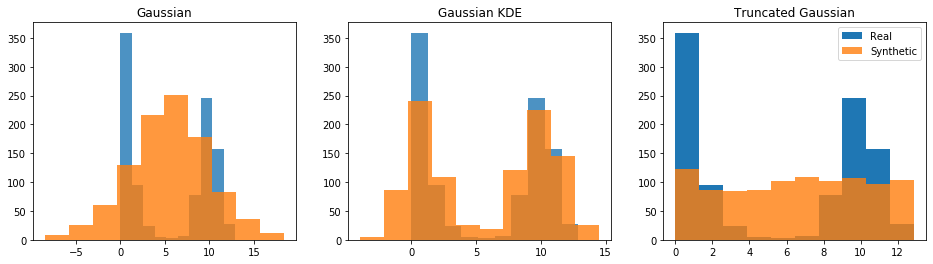

In [3]:
mask = np.random.randint(0, 2, size=1000)
data = np.random.exponential(size=1000)*mask + np.random.normal(loc=10.0, scale=1.0, size=1000)*(1-mask)
def fit_and_sample(model):
    model.fit(data)
    return model.sample(1000).flatten()

plt.figure(figsize=(16,4))

plt.subplot(1, 3, 1)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(GaussianUnivariate()), alpha=0.8, label="Synthetic")
plt.title("Gaussian")

plt.subplot(1, 3, 2)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(GaussianKDE()), alpha=0.8, label="Synthetic")
plt.title("Gaussian KDE")

plt.subplot(1, 3, 3)
plt.hist(data, label="Real")
plt.hist(fit_and_sample(TruncatedGaussian()), alpha=0.8, label="Synthetic")
plt.title("Truncated Gaussian")

plt.legend()
plt.show()

As the above histograms show, different univariate distributions are more suitable for different types of data. We provide a `select_univariate` method which uses the Kolmogorov–Smirnov test statistic to select the best fitting model.

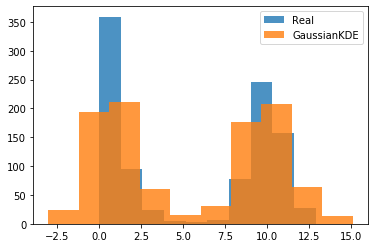

In [4]:
plt.figure()
best_model = select_univariate(data)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(best_model), alpha=0.8, label=type(best_model).__name__)
plt.legend()
plt.show()